In [2]:
import pdfplumber
from pprint import pprint

In [3]:
doc = pdfplumber.open('data/AUG_2025.pdf', password='MOHA1410')

In [73]:
p0 = doc.pages[1]

In [74]:
im = p0.to_image(resolution=150)
# im.save('data/page0.png')

In [75]:
table_settings = {
    'vertical_strategy': 'lines',
    'horizontal_strategy': 'text',
    'snap_y_tolerance': 4,
    'intersection_tolerance': 5,
}

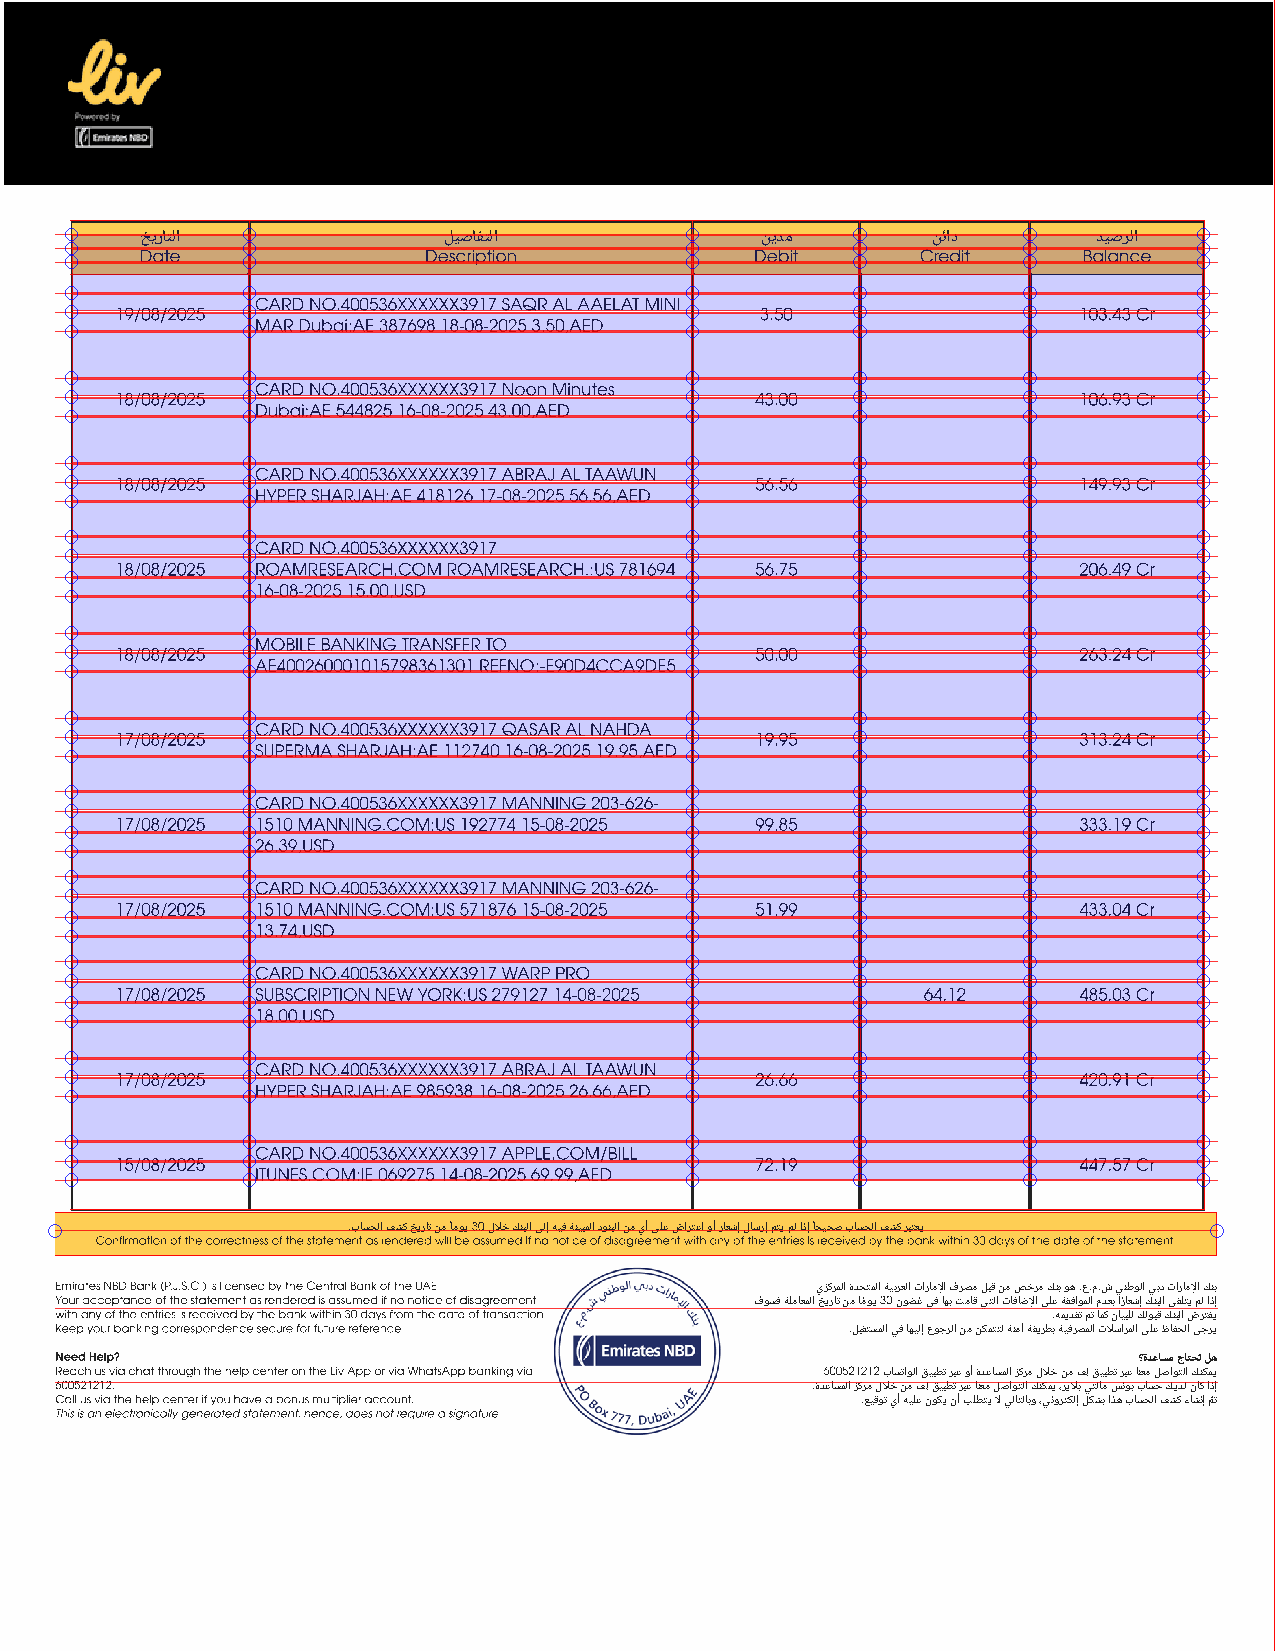

In [76]:
im.reset().debug_tablefinder(table_settings)

In [77]:
table_re = p0.extract_table(table_settings)

In [78]:
pprint(table_re[5])

['', '', '', '', '']


In [79]:
processed_rows = []
ix = 1
max_ix = len(table_re[1:])
date = ''
description = ''
debits = ''
credits = ''
balance = ''

while ix < max_ix:
    row = table_re[ix]
    if any(row):

        potential_date = row[0]
        potential_description = row[1]
        potential_debits = row[2]
        potential_credits = row[3]
        potential_balance = row[4]

        date += potential_date if potential_date else ''
        description += potential_description if potential_description else ''
        debits += potential_debits if potential_debits else ''
        credits += potential_credits if potential_credits else ''
        balance += potential_balance if potential_balance else ''
        print(f"Potential values: {potential_date}, {potential_description}, {potential_debits}, {potential_credits}, {potential_balance}")

        ix += 1
    else:
        print('Reached end of previous row')
        print(row)
        processed_rows.append({
            'date': date,
            'description': description,
            'debits': debits,
            'credits': credits,
            'balance': balance
        })

        date = ''
        description = ''
        debits = ''
        credits = ''
        balance = ''
        ix += 1
        row = table_re[ix]


Potential values: Date, Description, Debit, Credit, Balance
Reached end of previous row
['', '', '', '', '']
Potential values: 19/08/2025, CARD NO.400536XXXXXX3917 SAQR AL AAELAT MINI, 3.50, , 103.43 Cr
Potential values: , MAR Dubai:AE 387698 18-08-2025 3.50,AED, , , 
Reached end of previous row
['', '', '', '', '']
Potential values: 18/08/2025, CARD NO.400536XXXXXX3917 Noon Minutes, 43.00, , 106.93 Cr
Potential values: , Dubai:AE 544825 16-08-2025 43.00,AED, , , 
Reached end of previous row
['', '', '', '', '']
Potential values: 18/08/2025, CARD NO.400536XXXXXX3917 ABRAJ AL TAAWUN, 56.56, , 149.93 Cr
Potential values: , HYPER SHARJAH:AE 418126 17-08-2025 56.56,AED, , , 
Reached end of previous row
['', '', '', '', '']
Potential values: , CARD NO.400536XXXXXX3917, , , 
Potential values: 18/08/2025, ROAMRESEARCH.COM ROAMRESEARCH.:US 781694, 56.75, , 206.49 Cr
Potential values: , 16-08-2025 15.00,USD, , , 
Reached end of previous row
['', '', '', '', '']
Potential values: 18/08/2025, MOB

In [80]:
processed_rows


[{'date': 'Date',
  'description': 'Description',
  'debits': 'Debit',
  'credits': 'Credit',
  'balance': 'Balance'},
 {'date': '19/08/2025',
  'description': 'CARD NO.400536XXXXXX3917 SAQR AL AAELAT MINIMAR Dubai:AE 387698 18-08-2025 3.50,AED',
  'debits': '3.50',
  'credits': '',
  'balance': '103.43 Cr'},
 {'date': '18/08/2025',
  'description': 'CARD NO.400536XXXXXX3917 Noon MinutesDubai:AE 544825 16-08-2025 43.00,AED',
  'debits': '43.00',
  'credits': '',
  'balance': '106.93 Cr'},
 {'date': '18/08/2025',
  'description': 'CARD NO.400536XXXXXX3917 ABRAJ AL TAAWUNHYPER SHARJAH:AE 418126 17-08-2025 56.56,AED',
  'debits': '56.56',
  'credits': '',
  'balance': '149.93 Cr'},
 {'date': '18/08/2025',
  'description': 'CARD NO.400536XXXXXX3917ROAMRESEARCH.COM ROAMRESEARCH.:US 78169416-08-2025 15.00,USD',
  'debits': '56.75',
  'credits': '',
  'balance': '206.49 Cr'},
 {'date': '18/08/2025',
  'description': 'MOBILE BANKING TRANSFER TOAE400260001015798361301 REFNO:-E90D4CCA9DE5',
  'd

In [100]:
import pandas as pd

In [101]:
df = pd.DataFrame(processed_rows)
df.columns = ['date', 'description', 'debits', 'credits', 'balance']

In [102]:
df.head()

,date,description,debits,credits,balance
0,16APR25,BROUGHT FORWARD,,,180.50
1,17APR25,POS-PURCHASE CARD NO. 4005-3XXX-XXXX-3917 EMAR...,50.00,,130.50
2,17APR25,SDM DEPOSIT CR SDM REF.-E4011-6XXX-XXXX-4049;A...,,500.00,630.50
3,18APR25,POS-PURCHASE CARD NO. 4005-3XXX-XXXX-3917 ROAM...,56.75,,573.75
